In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
file_path = 'bank-full.csv'
df = pd.read_csv(file_path,sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Understanding the data Set

In [6]:
# cheak null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# features of the data set with values

categorical_columns = df.select_dtypes(include=['object']).columns  # Identify categorical columns
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Unique values in marital: ['married' 'single' 'divorced']
Unique values in education: ['tertiary' 'secondary' 'unknown' 'primary']
Unique values in default: ['no' 'yes']
Unique values in housing: ['yes' 'no']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['unknown' 'cellular' 'telephone']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in poutcome: ['unknown' 'failure' 'other' 'success']
Unique values in y: ['no' 'yes']


In [8]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns  # Identify categorical columns
for column in numerical_columns:
    print(f"{column}")


age
balance
day
duration
campaign
pdays
previous


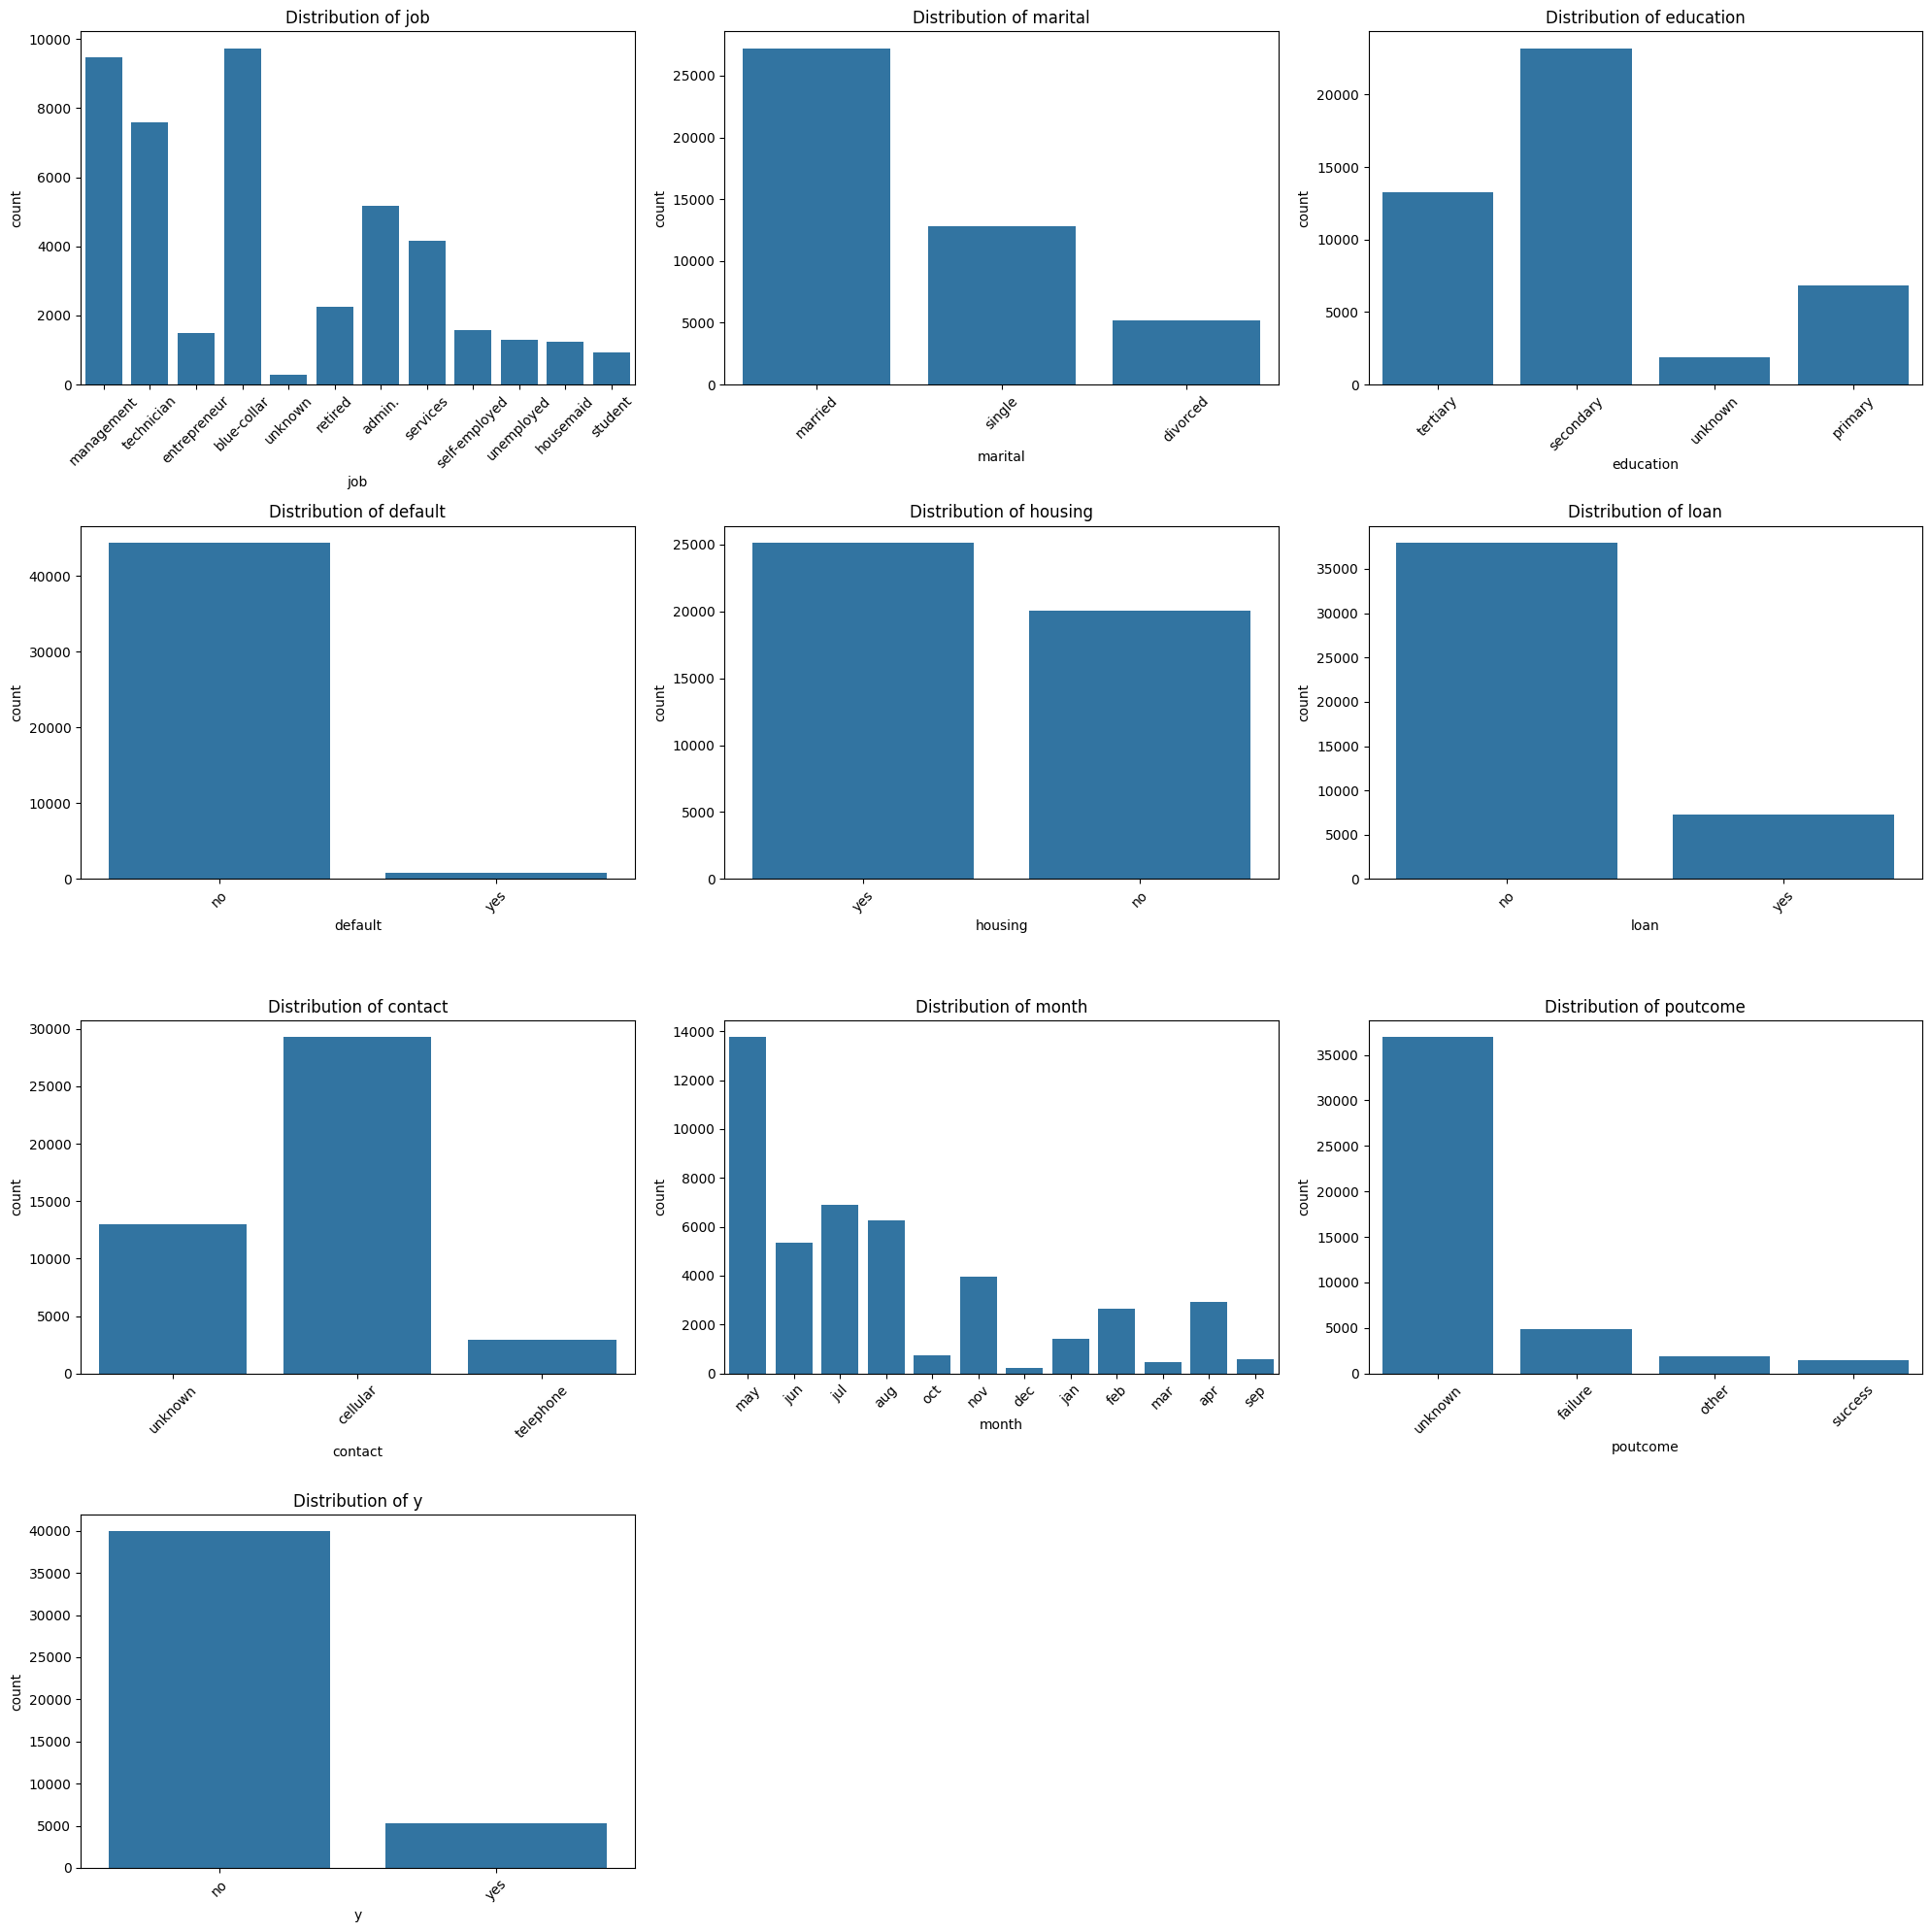

In [ ]:
#categorical features visual
n_cols = 3  
n_rows = (len(categorical_columns) // n_cols) + 1  

plt.figure(figsize=(20, 5 * n_rows))
plt_number = 1
for column in categorical_columns:
    ax = plt.subplot(n_rows, n_cols, plt_number)
    sns.countplot(x=column, data=df)
    plt.xlabel(column)  
    plt.title(f'Distribution of {column}') 
    plt.xticks(rotation=45)  
    plt_number += 1

plt.tight_layout()

plt.show()


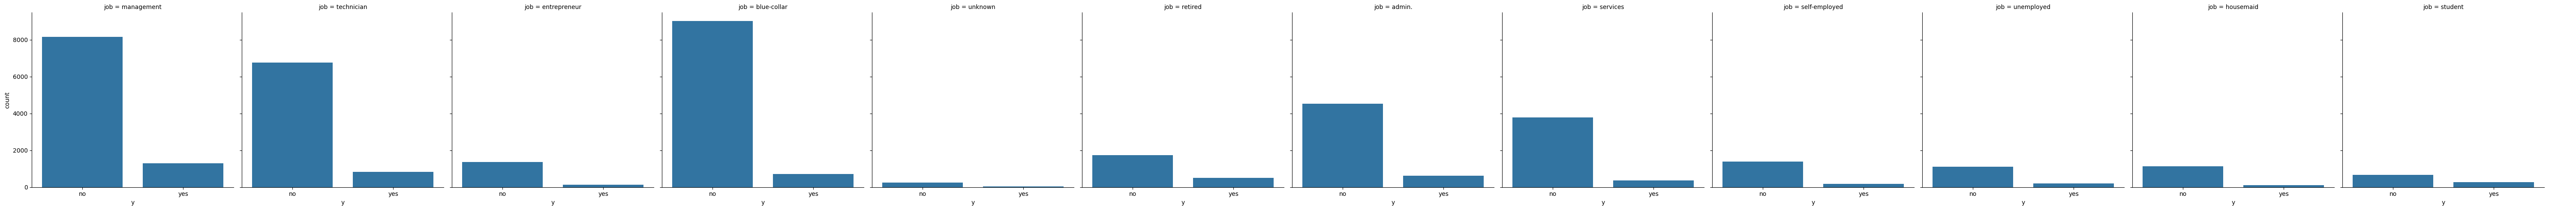

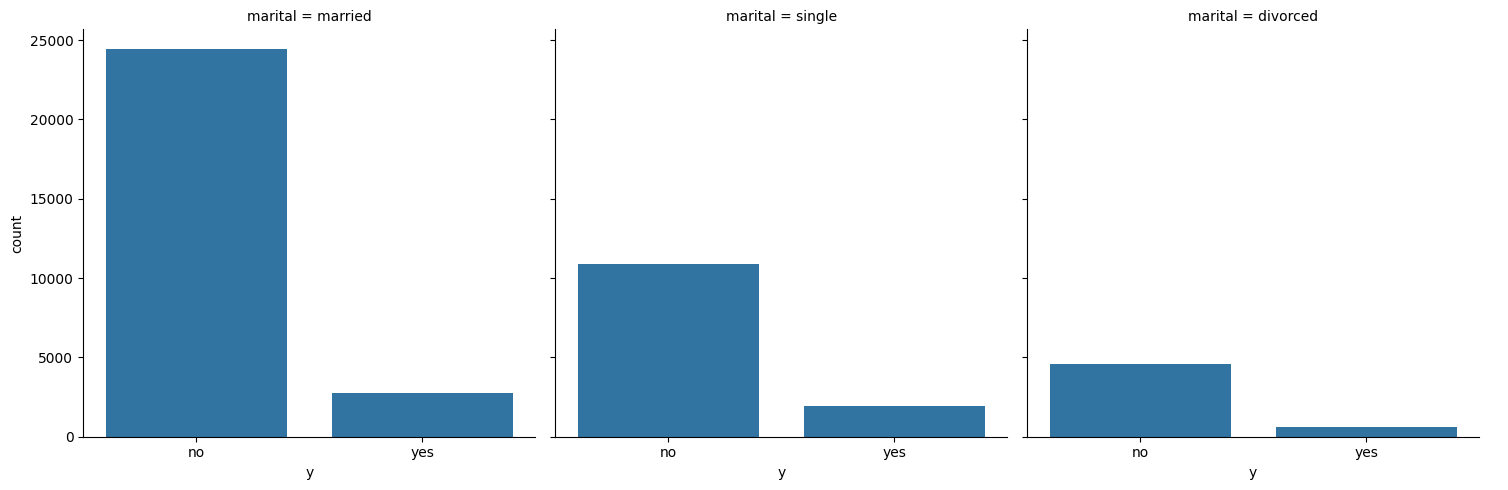

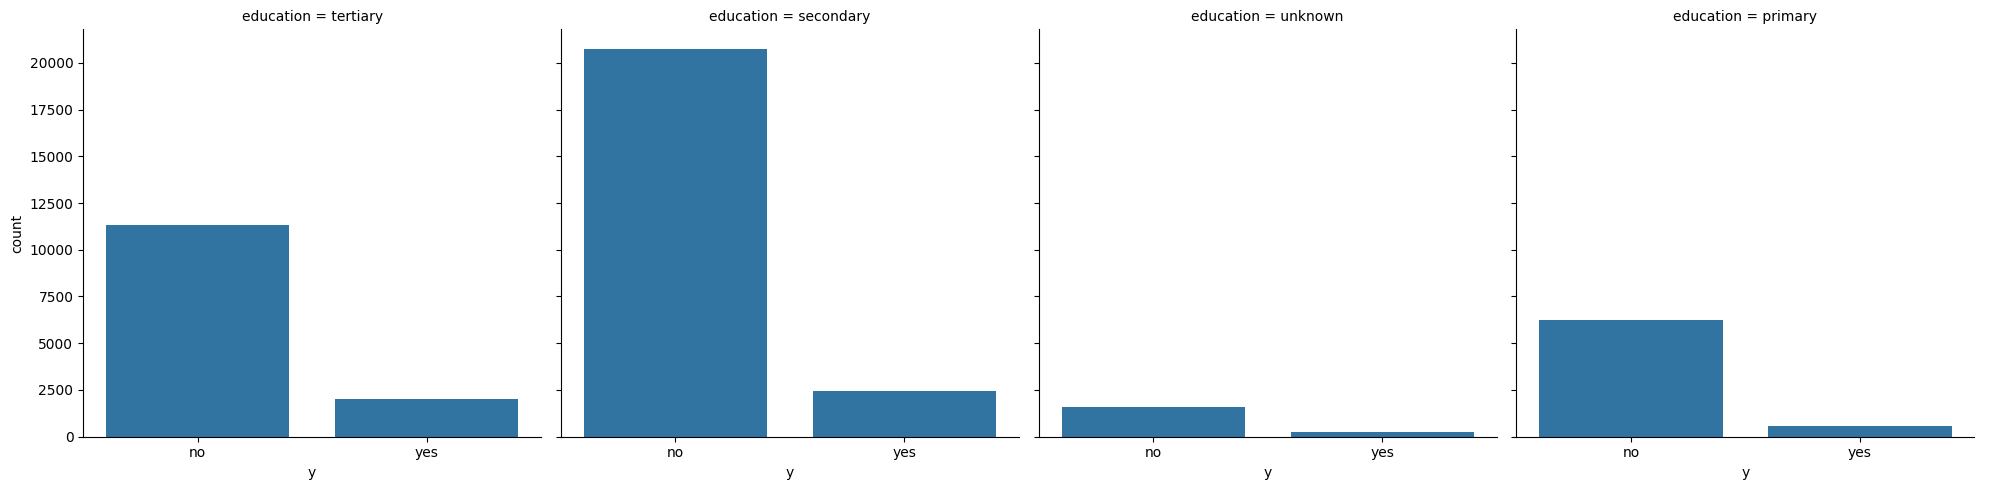

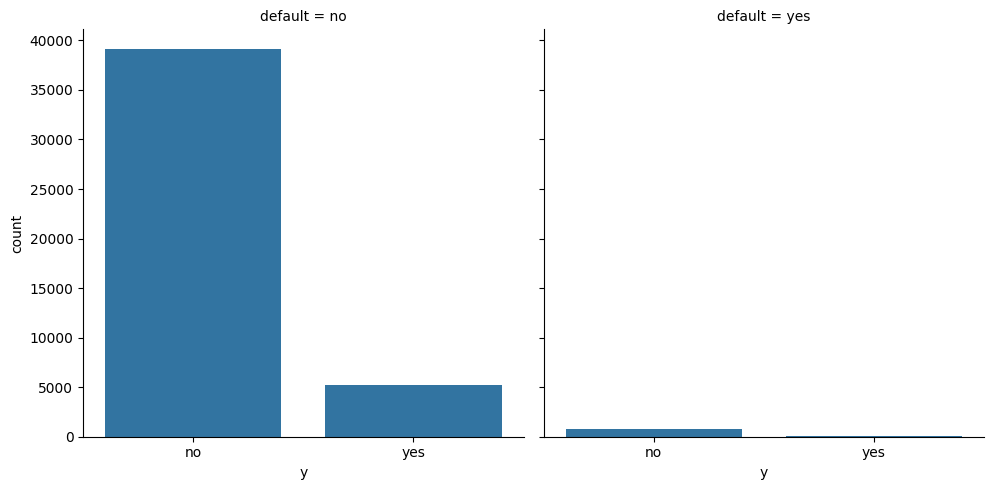

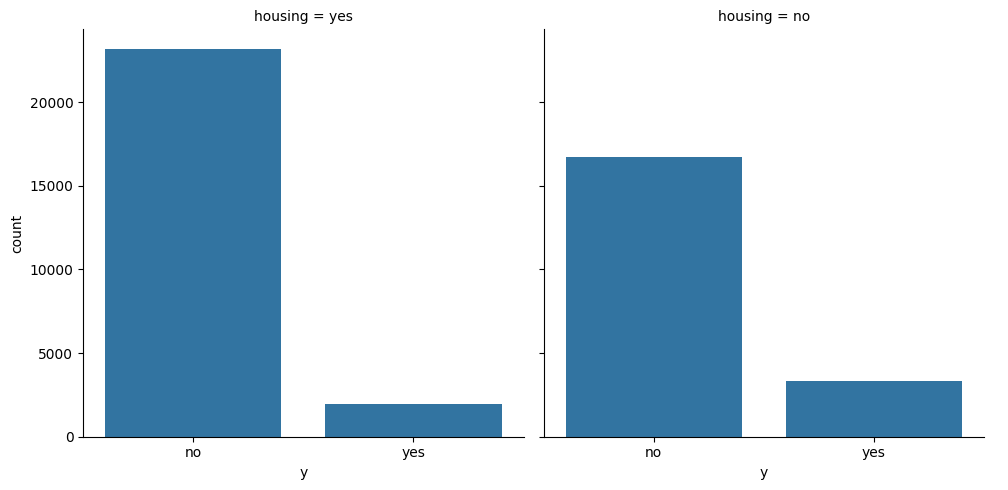

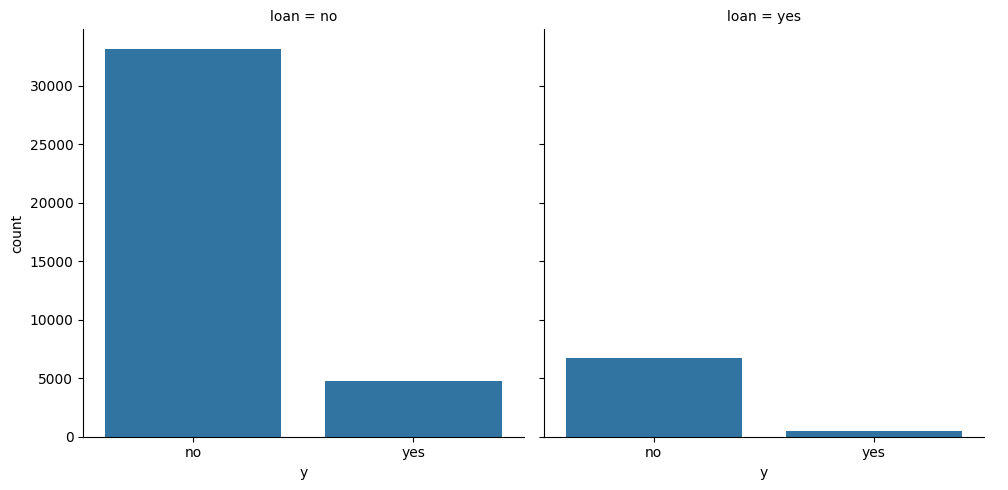

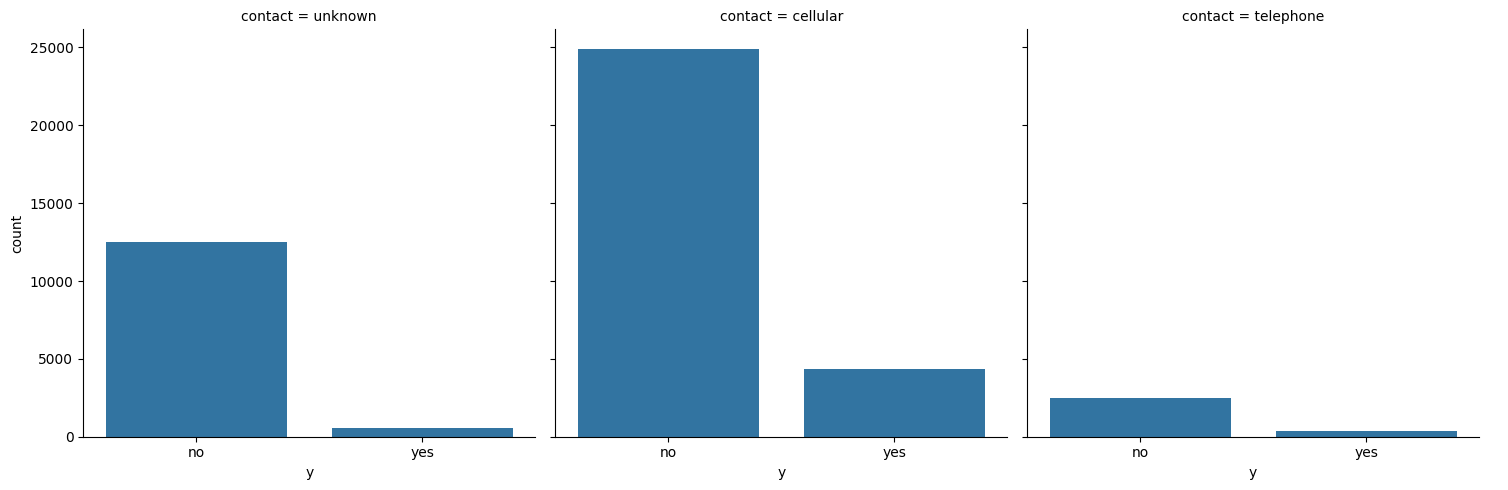

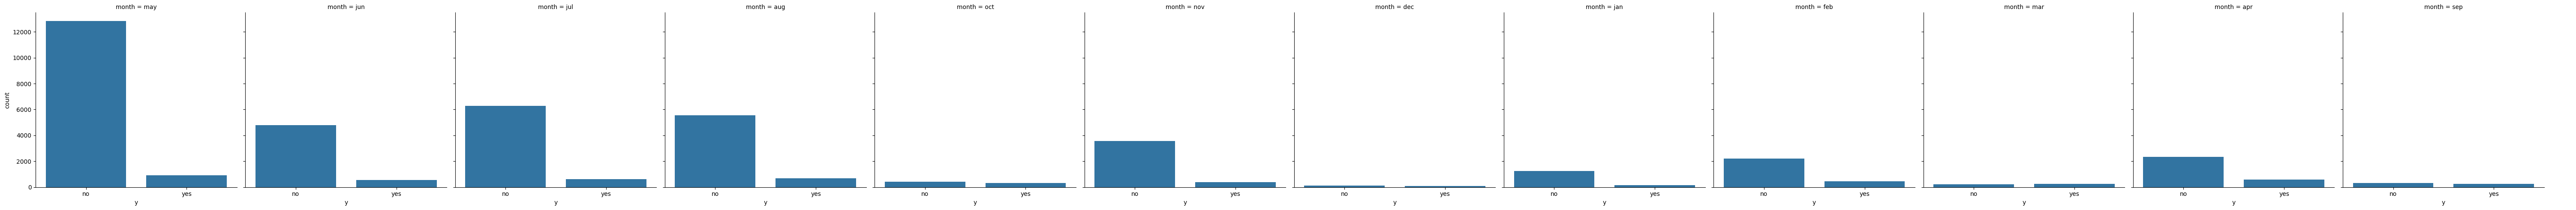

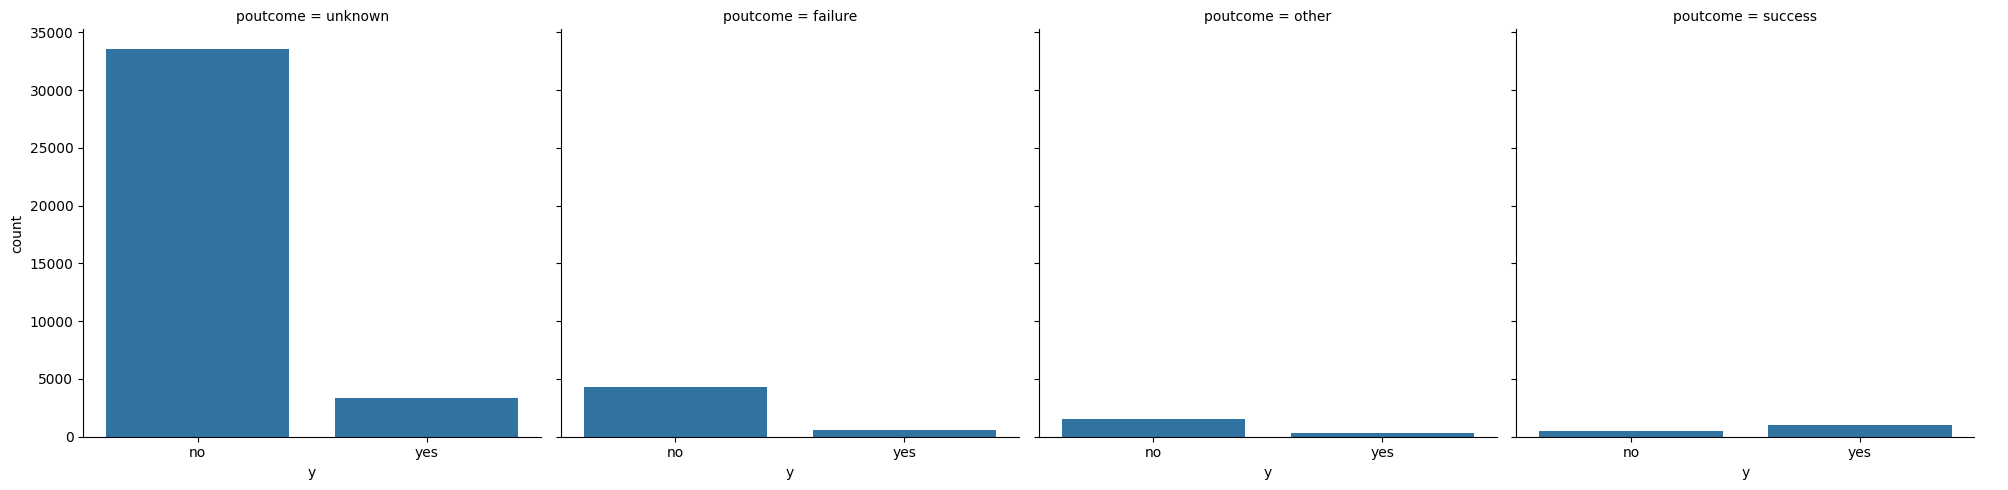

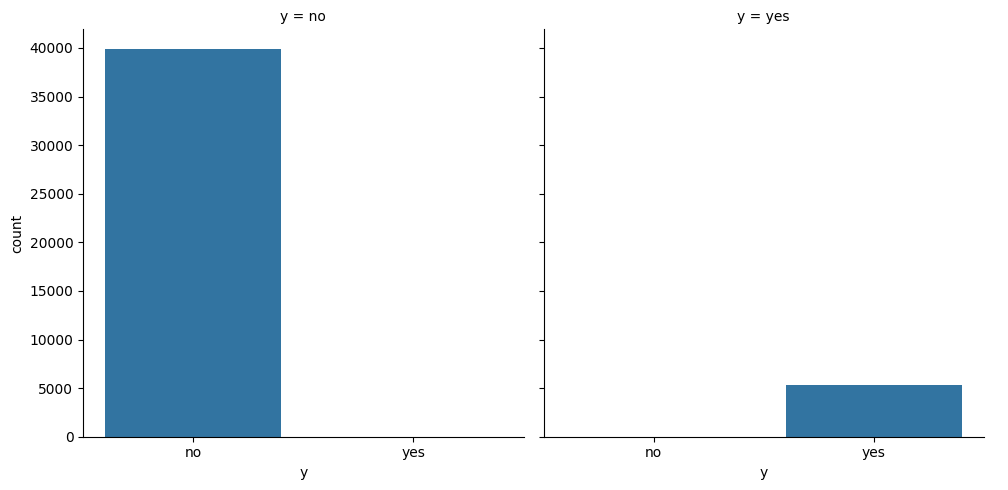

In [14]:
for col in categorical_columns:
    sns.catplot(x="y",col = col,kind= "count", data = df)
plt.show()


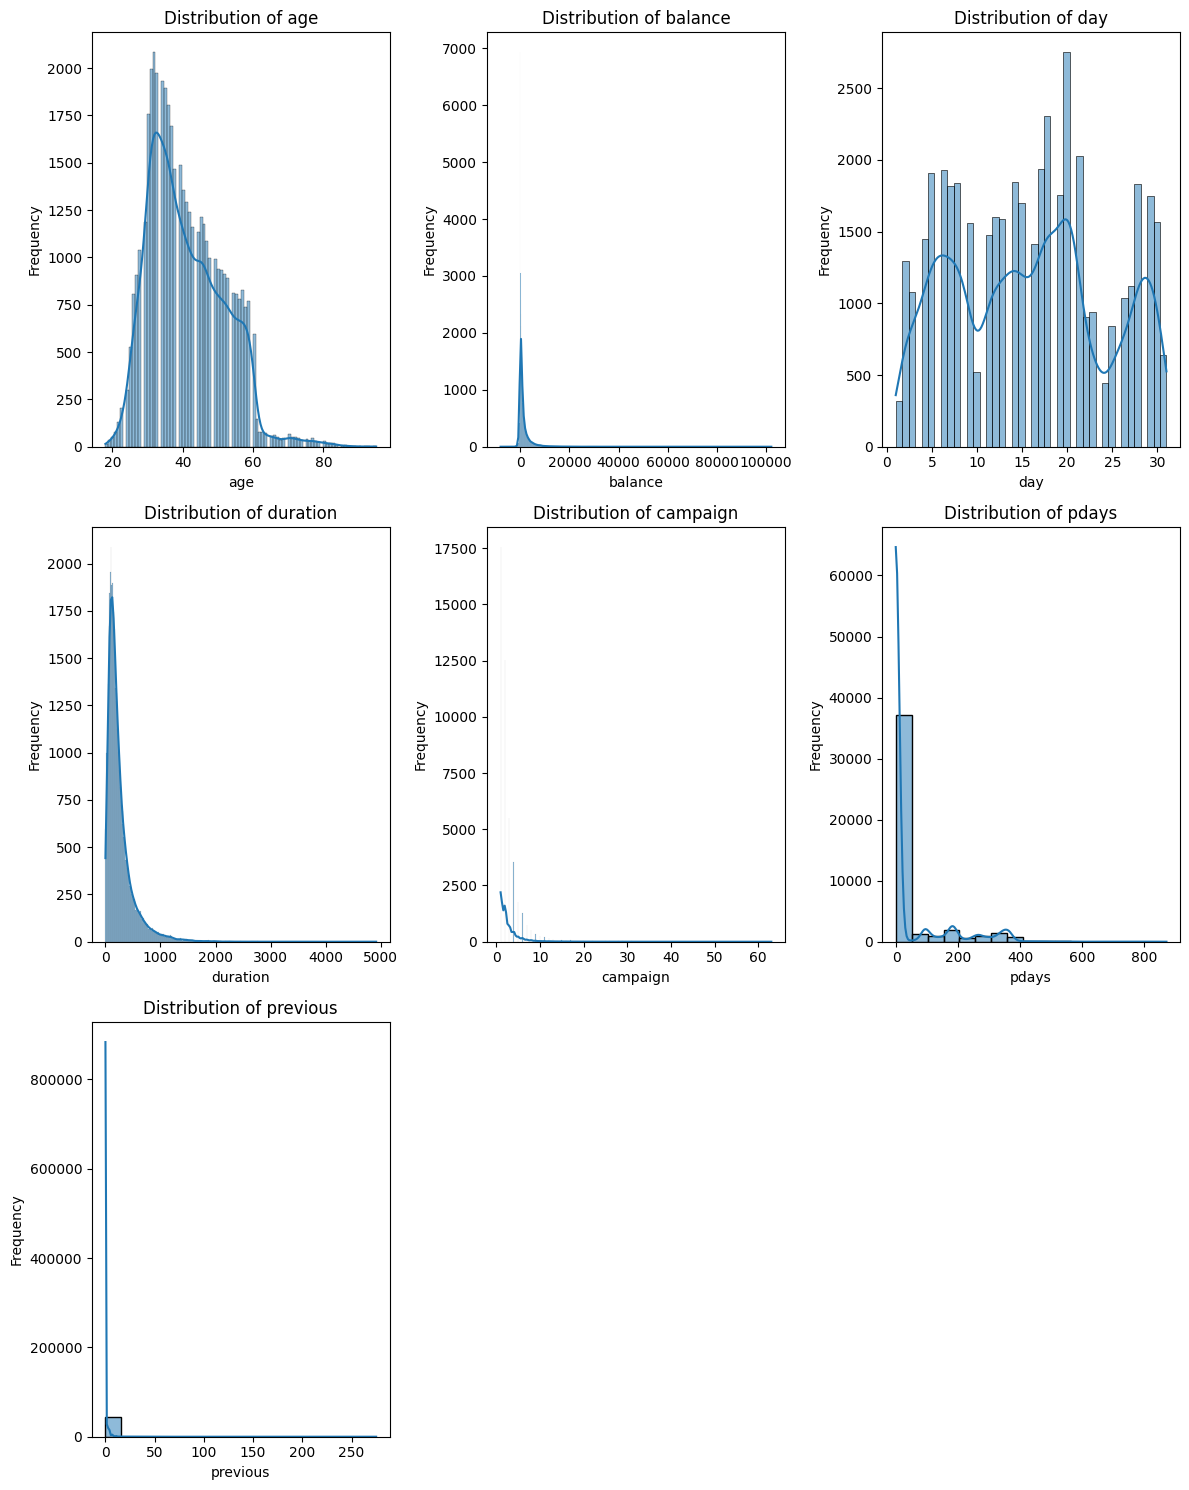

In [ ]:
n_cols = 3  
n_rows = (len(numerical_columns) // n_cols) + 1 


plt.figure(figsize=(12, 5 * n_rows))
plt_number = 1

for col in numerical_columns:
    ax = plt.subplot(n_rows, n_cols, plt_number)
    sns.histplot(df[col], kde=True)  
    plt.xlabel(col)  
    plt.ylabel('Frequency')  
    plt.title(f'Distribution of {col}') 
    plt_number += 1


plt.tight_layout()


plt.show()